In [0]:
import pandas as pd 
import numpy as np

In [0]:
train=pd.read_csv("/content/train.csv")

In [57]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
train.drop(['Name'],axis=1,inplace=True)

In [59]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [61]:
train.index

RangeIndex(start=0, stop=891, step=1)

In [62]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


### Checking for null values

In [63]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [64]:
train.index

RangeIndex(start=0, stop=891, step=1)

### Dropping columns with too much null values and non required data

In [0]:
train.drop(['Cabin'],axis=1,inplace=True)
train.drop(['Ticket'],axis=1,inplace=True)
train.drop(['PassengerId'],axis=1,inplace=True)

In [68]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Visualization

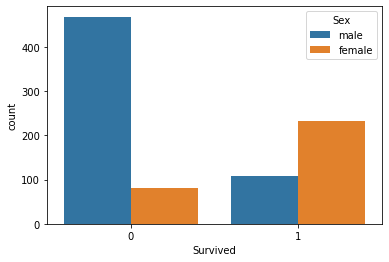

In [69]:
import seaborn as sns
sns.countplot(x='Survived',hue='Sex',data=train)

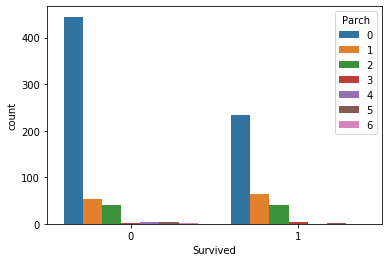

In [70]:
sns.countplot(x='Survived',hue='Parch',data=train)

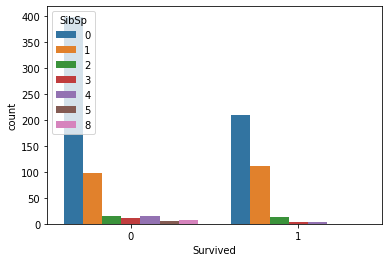

In [71]:
sns.countplot(x='Survived',hue='SibSp',data=train)

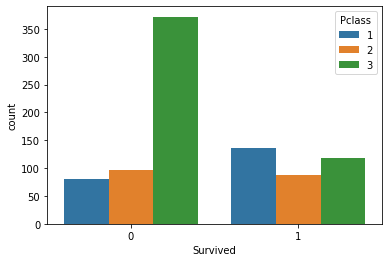

In [72]:
sns.countplot(x='Survived',hue='Pclass',data=train)

### transformation

In [73]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [74]:
train['Age'].mean()

29.69911764705882

### Replacing null values by mean of the vaues of column data

In [0]:
train['Age'].fillna((train['Age'].mean()), inplace=True)

#### Dropping null values from train

In [30]:
train.dropna()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [32]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [33]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Transforming instead of skewing

In [0]:
Pclass=pd.get_dummies(train['Pclass'],drop_first=True)
Sex=pd.get_dummies(train['Sex'],drop_first=True)
Embarked=pd.get_dummies(train['Embarked'],drop_first=True)

### Joining newly created dummy data columns 

In [0]:
train=pd.concat([train,Pclass,Sex,Embarked],axis=1)

### Dropping old columns

In [0]:
train.drop(['Sex','Embarked','Pclass'],axis=1,inplace=True)

In [79]:
train.head()

,Survived,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


In [80]:
test.head()

AttributeError: ignored

#### Separating X and y

In [0]:
y=train['Survived']

In [97]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [0]:
X=train.drop('Survived',axis=1)

In [123]:
X.head()

,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,22.0,1,0,7.2500,0,1,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,1,0,0,1
3,35.0,1,0,53.1000,0,0,0,0,1
4,35.0,0,0,8.0500,0,1,1,0,1


## Creating Neural Network

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
scaler.fit(X)
X_transformed = scaler.transform(X)
X_train,X_test,y_train,y_test = train_test_split(X_transformed,y,test_size=0.3)

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [131]:
# Initialising the NN
model = Sequential()

# layers
model.add(Dense(9, kernel_initializer = 'uniform', activation = 'relu', input_dim = 9))
model.add(Dense(9, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 9)                 90        
_________________________________________________________________
dense_10 (Dense)             (None, 9)                 90        
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 50        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 6         
Total params: 236
Trainable params: 236
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [133]:
model.fit(X_train, y_train, batch_size = 32, nb_epoch = 100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/100
623/623 [==============================] - 0s 615us/step - loss: 0.6922 - acc: 0.6019
Epoch 2/100
623/623 [==============================] - 0s 58us/step - loss: 0.6902 - acc: 0.6148
Epoch 3/100
623/623 [==============================] - 0s 53us/step - loss: 0.6879 - acc: 0.6148
Epoch 4/100
623/623 [==============================] - 0s 46us/step - loss: 0.6850 - acc: 0.6148
Epoch 5/100
623/623 [==============================] - 0s 54us/step - loss: 0.6800 - acc: 0.6148
Epoch 6/100
623/623 [==============================] - 0s 48us/step - loss: 0.6700 - acc: 0.6148
Epoch 7/100
623/623 [==============================] - 0s 49us/step - loss: 0.6524 - acc: 0.6148
Epoch 8/100
623/623 [==============================] - 0s 53us/step - loss: 0.6256 - acc: 0.6148
Epoch 9/100
623/623 [==============================] - 0s 61us/step - loss: 0.5974 - acc: 0.6180
Epoch 10/100
623/623 [==============================] - 0s 51us/step - loss: 0.5686 - acc: 0.7384
Epoch 11/100
623/623 [======

## Predicting 

In [142]:
y_pred = model.predict(X_test)
y_final = (y_pred > 0.5).astype(int)
print("Accuracy:"+str(accuracy_score(y_final,y_test)*100))

Accuracy:83.5820895522388
